# Univariate Visualizations

**Data visualization** can reveal details about a feature (or features) that statistics alone cannot. 

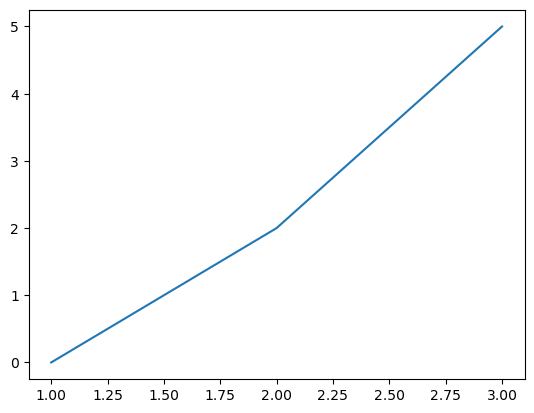

In [2]:
#matpolotlib is the original python visualization package
from matplotlib import pyplot as plt

plt.plot([1,2,3],[0,2,5])
plt.show()

Add labels and a title to the plot

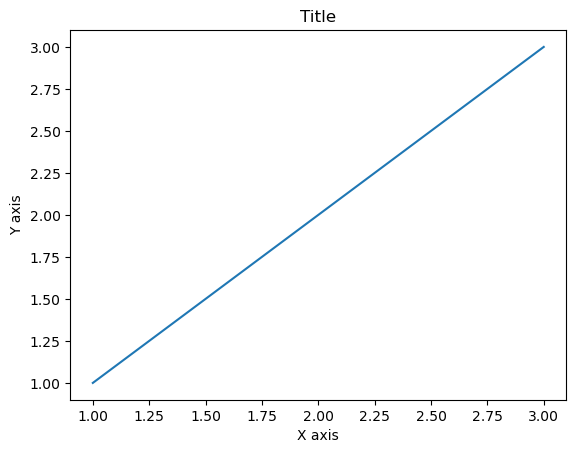

In [3]:
#Add aspects to the plot.

plt.plot([1,2,3],[1,2,3])
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Title')
plt.show()

Add a legend

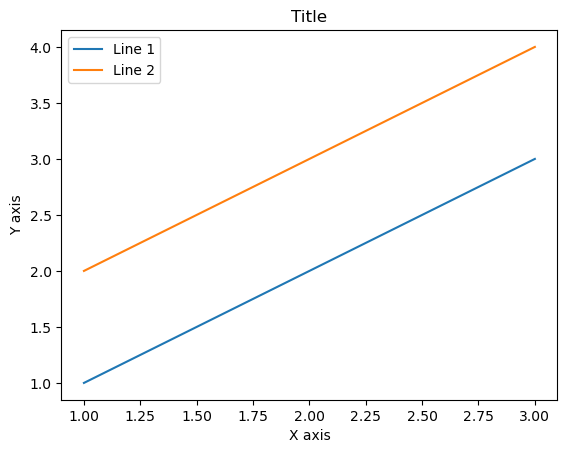

In [4]:
plt.plot([1,2,3],[1,2,3], label = 'Line 1')
plt.plot([1,2,3],[2,3,4], label = 'Line 2')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Title')
plt.legend()
plt.show()

Changing the color. You can specify the color in different ways (letter, name, hex RGB)

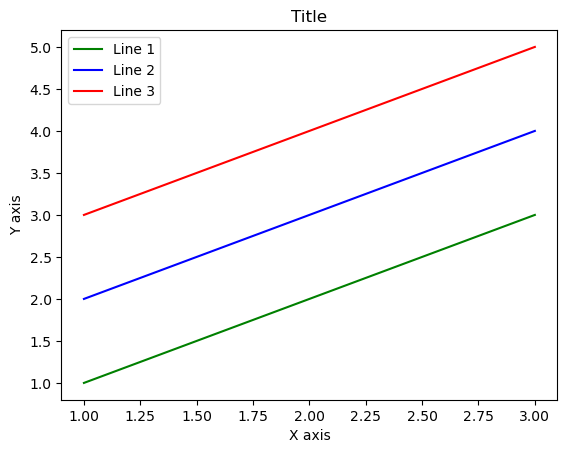

In [5]:
#lines
plt.plot([1,2,3],[1,2,3], label = 'Line 1', color = 'g') #set as green
plt.plot([1,2,3],[2,3,4], label = 'Line 2', color = 'blue') #set as blue
plt.plot([1,2,3],[3,4,5], label = 'Line 3', color = '#ff0000') #set as red

#labels
plt.xlabel('X axis')
plt.ylabel('Y axis')

#title
plt.title('Title')

#legend
plt.legend()

#show the plot
plt.show()

Markers. You can specify marking the points and setting up different symbols. The default is a point. You can find a full list of markers in the [Matplotlib documentation](https://matplotlib.org/stable/api/markers_api.html).

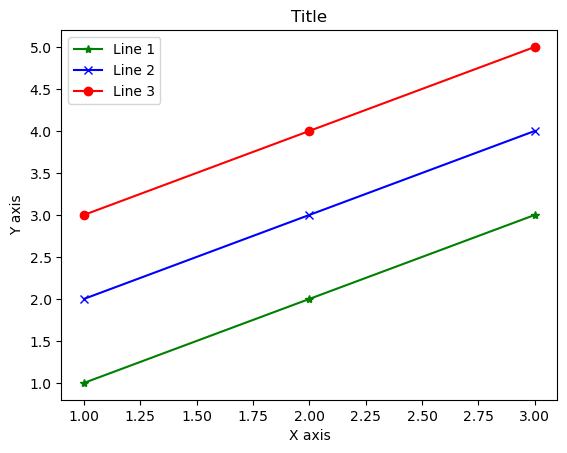

In [6]:
#lines
plt.plot([1,2,3],[1,2,3], label = 'Line 1', color = 'g', marker="*")
plt.plot([1,2,3],[2,3,4], label = 'Line 2', color = 'blue', marker="x")
plt.plot([1,2,3],[3,4,5], label = 'Line 3', color = '#ff0000', marker="o")

#labels
plt.xlabel('X axis')
plt.ylabel('Y axis')

#title
plt.title('Title')

#legend
plt.legend()

#show the plot
plt.show()

## Histogram

A histogram visualizes the distribution of data over a continuous interval or period of time. Each bar represents the count, or frequency, of samples for each bin or category. Histograms allow us to view the normality of a distribution, like the line drawings we looked at previously (see diagram below)

<function matplotlib.pyplot.show(close=None, block=None)>

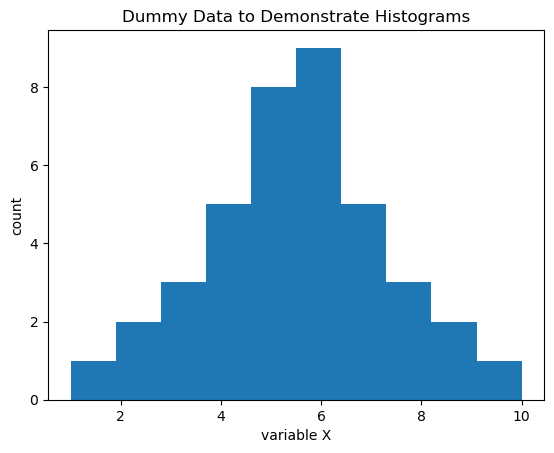

In [7]:
from matplotlib import pyplot as plt

myList = [1,2,2,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,7,7,7,7,7,8,8,8,9,9,10]
plt.hist(myList)
plt.title('Dummy Data to Demonstrate Histograms')
plt.xlabel('variable X')
plt.ylabel('count')
plt.show  # Once .show is called, the plt object is deleted in memory

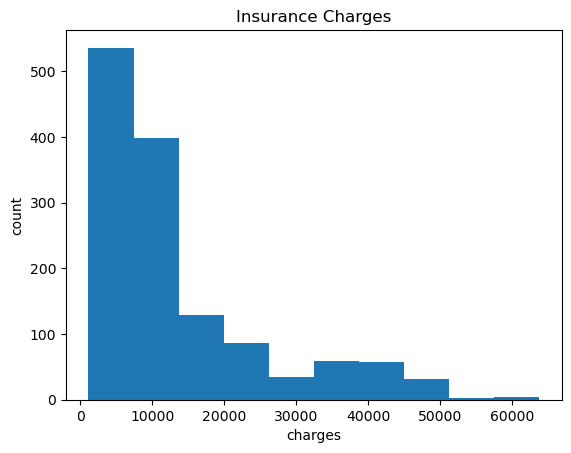

In [10]:
import pandas as pd

df = pd.read_csv('C:/Users/skous2/Documents/GitHub/IS-315-Code/data/insurance.csv')
plt.hist(df.charges)

plt.title('Insurance Charges')
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

Set the number of bins. (Note: plt leaves memory after plot.show)

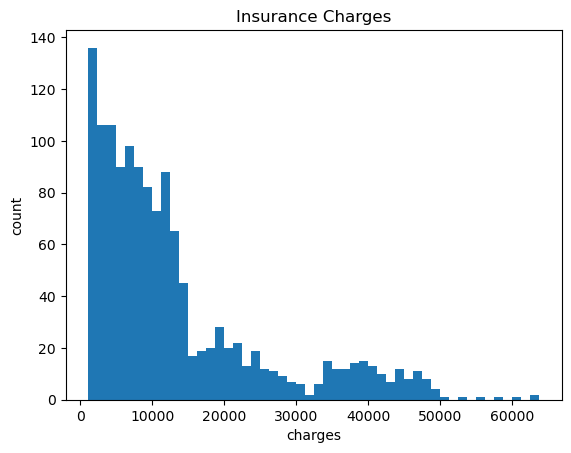

In [11]:
plt.hist(df.charges, bins = 50)

plt.title('Insurance Charges')
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

How many bins is correct?

One good rule that balances both simplicity and efficacy across many scenarios is that the number of bins should be equal to the cubed root of n, where n equals the sample size of the distribution. Let’s implement that in our insurance data:

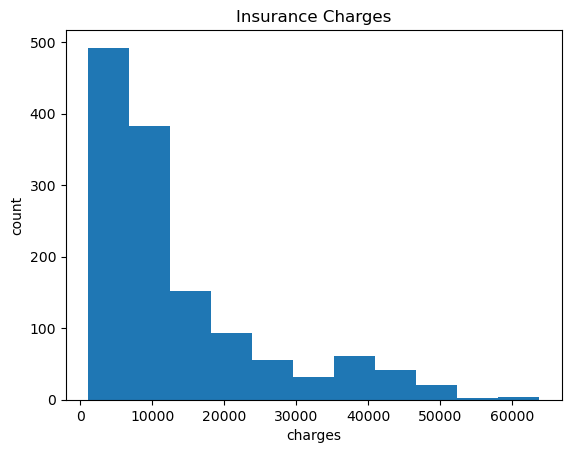

In [12]:
# To calculate the cubed root, raise n (sample size) to the 1/3 power: 
plt.hist(df.charges, bins=int(round(df.charges.count()**(1/3), 0)))
plt.title('Insurance Charges')
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

## Mean Line

When the data is highly skewed, as in the image above, it may help to know where the mean lies in the distribution.

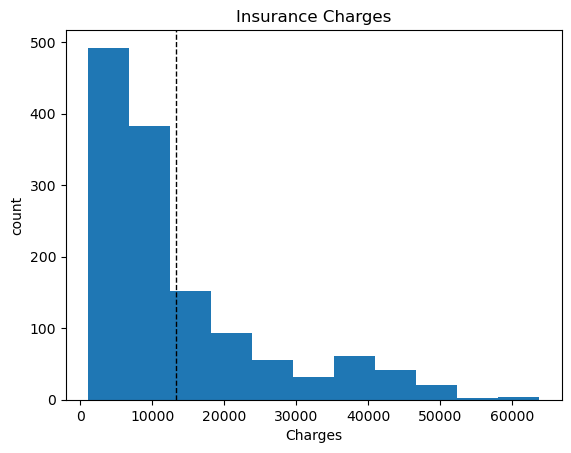

In [13]:
plt.hist(df.charges, bins=int(round(df.charges.count()**(1/3), 0)))
plt.title('Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('count')

# Add a vertical line using axvline() method
plt.axvline(df.charges.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

## Embedding Text

 It is common during the Data Understanding Phase to use statistics and charts hand in hand to explore the variables/columns in the dataset. Therefore, you can use the .text() method of the plt object to embed those statistics.

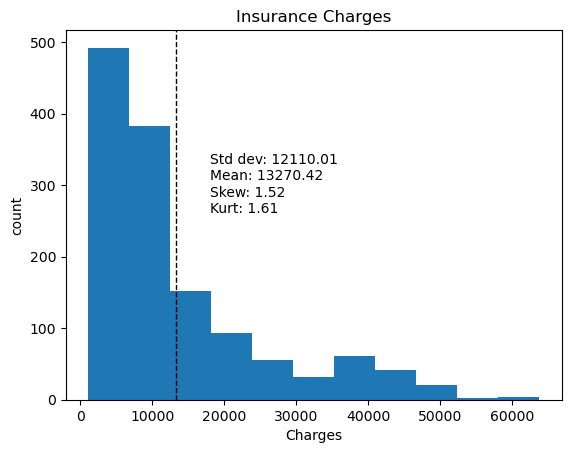

In [14]:
plt.hist(df.charges, bins=int(round(df.charges.count()**(1/3), 0)))

text  = 'Std dev: ' + str(round(df.charges.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.charges.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.charges.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.charges.kurt(), 2))

# plt.text(horizontal position, vertical position, text, ...)
#          vertical and horizontal positions are percents on decimal form from 0 to 1
#          vertical=0 starts at the far left; higher numbers push the text right
#          horizontal=0 starts at the bottom; higher  numbers push the text up 
plt.text(0.35, 0.5, text, fontsize=10, transform=plt.gcf().transFigure)
plt.axvline(df.charges.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('count')
plt.show()

## Seaborn

 Seaborn ([documentation](https://seaborn.pydata.org/)) is based on Matplotlib, but has many more advanced features and simplified methods for more complex plots. Besides adding a KDE, Seaborn allows us to easily include a rug plot, which allows us to visualize the density of the values:

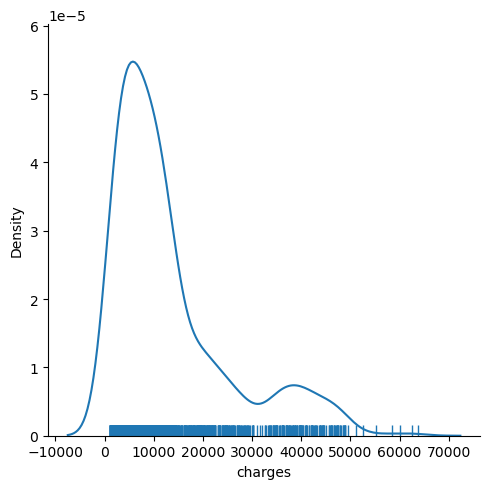

In [15]:
import seaborn as sns

ax = sns.displot(data=df, x='charges', rug=True, kind="kde")

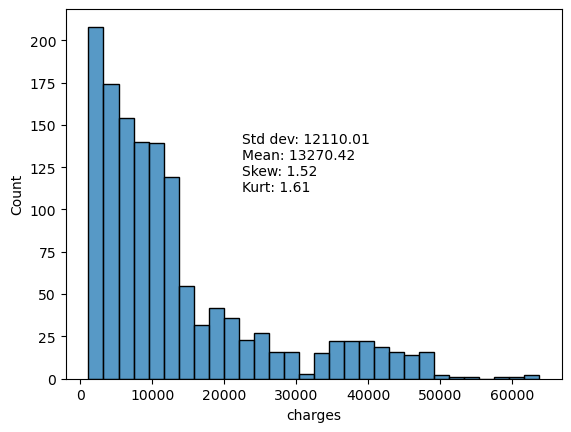

In [16]:
text =  'Std dev: ' + str(round(df.charges.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.charges.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.charges.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.charges.kurt(), 2))

ax = sns.histplot(data=df, x='charges')
ax.text(0.4, 0.5, text, fontsize=10, transform=plt.gcf().transFigure);

## Save and Export

Once you’ve created the perfect visualization, you may need to export it to use it in a presentation, a report, or elsewhere. You can print any chart using .savefig().

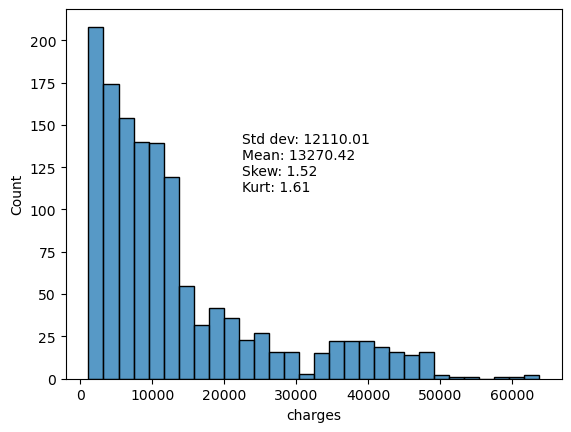

In [17]:
text =  'Std dev: ' + str(round(df.charges.std(), 2)) + '\n'
text += 'Mean: ' + str(round(df.charges.mean(), 2)) + '\n'
text += 'Skew: ' + str(round(df.charges.skew(), 2)) + '\n'
text += 'Kurt: ' + str(round(df.charges.kurt(), 2))

ax = sns.histplot(data=df, x='charges')
ax.text(0.4, 0.5, text, fontsize=10, transform=plt.gcf().transFigure);
plt.savefig('charges.png', dpi=100) # Must appear before plt.show()
# plt.savefig(' [file location] ') # You can specify a different folder

## Box Plots

Simple by effective charts for visualizing the quartiles of a distribution. The box contains the middle 50 percent of the data for a single variable (or the interquartile range), and it has a line through it representing the median of the data.

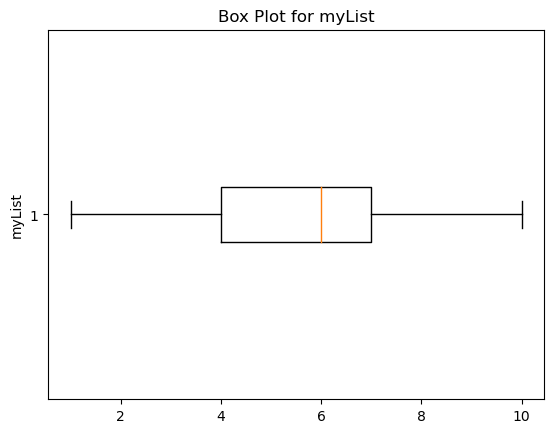

In [18]:
myList = [1,2,2,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,7,7,7,7,7,8,8,8,9,9,10]

plt.boxplot(myList, vert=False)
plt.title('Box Plot for myList')
plt.ylabel('myList')
plt.show()

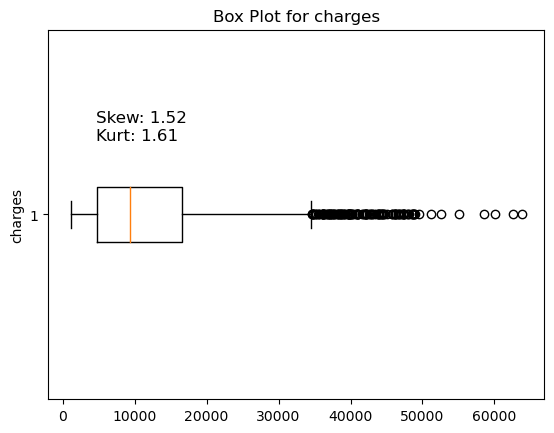

In [23]:
s = str(round(df.charges.skew(), 2))
k = str(round(df.charges.kurt(), 2))
text = 'Skew: ' + s + '\n' + 'Kurt: ' + k

plt.text(.2, .65, text, fontsize=12, transform=plt.gcf().transFigure)
plt.boxplot(df.charges, vert=False)
plt.title('Box Plot for charges')
plt.ylabel('charges')
plt.show()

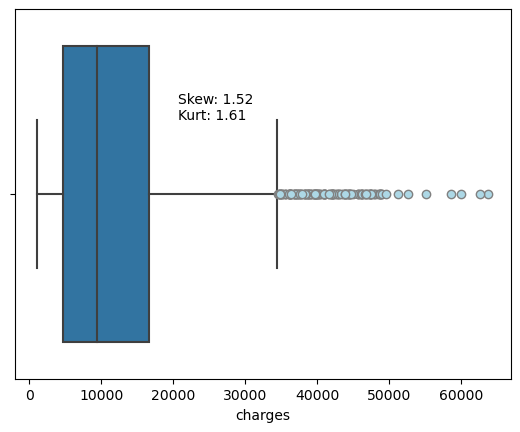

In [24]:
import seaborn as sns
        
s = str(round(df.charges.skew(), 2))
k = str(round(df.charges.kurt(), 2))
text = 'Skew: ' + s + '\n' + 'Kurt: ' + k

plt.text(.38, .65, text, fontsize=10, transform=plt.gcf().transFigure)
outlier_format = dict(marker='o', markerfacecolor='lightblue', markersize=6, linestyle='none', markeredgecolor='gray')
sns.boxplot(x=df.charges, flierprops=outlier_format)
plt.show()

## Multiple Plots

Even though histograms and box plots are univariate charts, it is often useful to combine them across values of other variables.

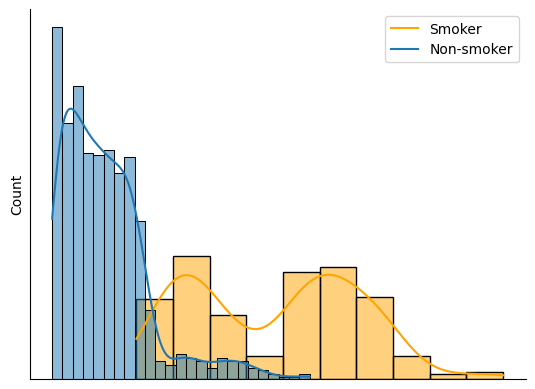

In [26]:
ax = sns.histplot(data=df[df['smoker']=='yes'], x="charges", kde=True, color="orange")
ax = sns.histplot(data=df[df['smoker']=='no'], x="charges", kde=True)

ax.set(yticks=[])
ax.set(xticks=[])
ax.set_xlabel('')
ax.legend(labels=['Smoker', 'Non-smoker'])
sns.despine(ax=ax)

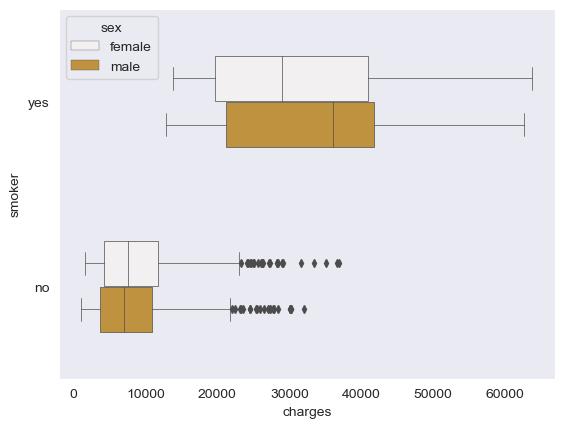

In [33]:
sns.set_style('dark')
ax = sns.boxplot(x=df.charges,  y=df.smoker, hue=df.sex, fliersize=4, color='orange', saturation=0.50, width=0.50, linewidth=0.5)

## Combining Charts

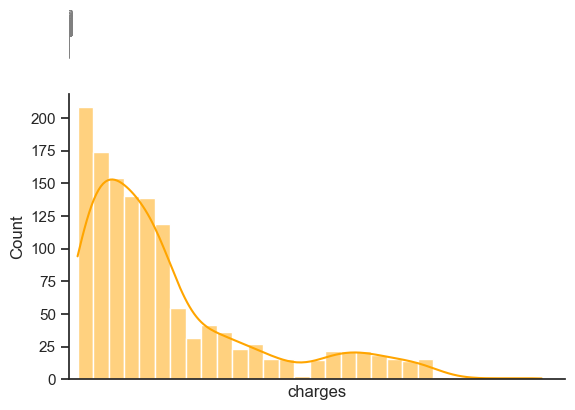

In [40]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        
sns.set_style('ticks')

flierprops = dict(marker='o', markersize=4, markerfacecolor='none', linestyle='none', markeredgecolor='gray')
sns.boxplot(df.charges, ax=ax_box, fliersize=4, width=0.50, linewidth=0.5, flierprops=flierprops)
sns.histplot(data=df, x="charges", ax=ax_hist, kde=True, color="orange")

ax_box.set(yticks=[])
ax_box.set(xticks=[])
ax_box.set_xlabel('')
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True, bottom=True)

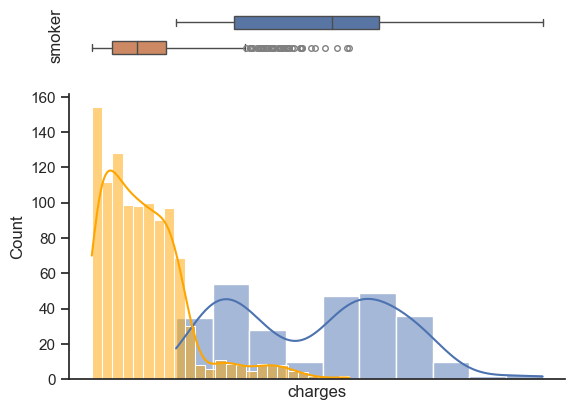

In [41]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
        
sns.set(style="ticks")

flierprops = dict(marker='o', markersize=4, markerfacecolor='none', linestyle='none', markeredgecolor='gray')
sns.boxplot(x=df.charges, y=df.smoker, ax=ax_box, fliersize=4, width=0.50, linewidth=1, flierprops=flierprops)

sns.histplot(data=df[df['smoker']=='yes'], x="charges", ax=ax_hist, kde=True)
sns.histplot(data=df[df['smoker']=='no'], x="charges", ax=ax_hist, kde=True, color="orange")

ax_box.set(yticks=[])
ax_box.set(xticks=[])
ax_box.set_xlabel('')
sns.despine(ax=ax_hist)                        
sns.despine(ax=ax_box, left=True, bottom=True) 

## Categorical Plots

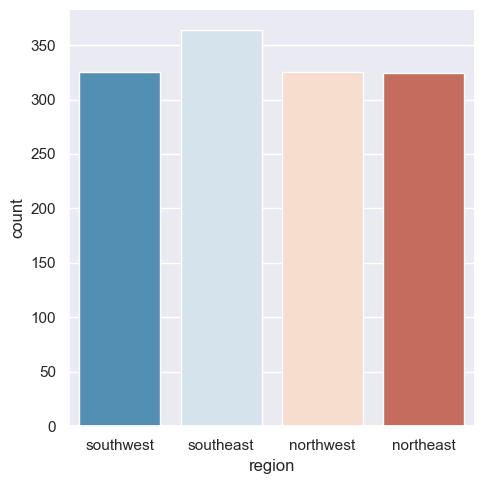

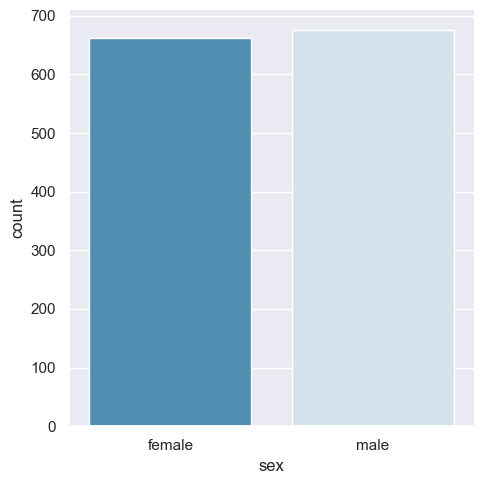

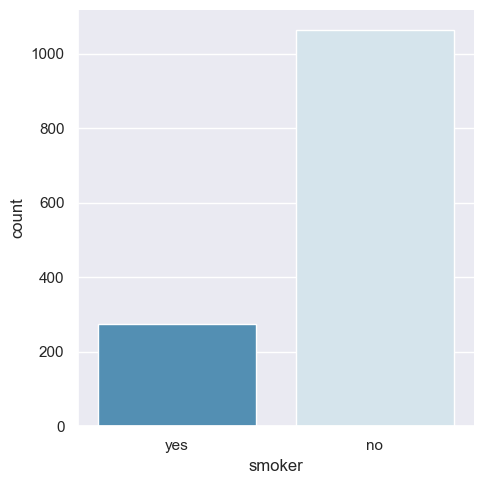

In [42]:
sns.set_style("white")  # Options: darkgrid, whitegrid, dark, white, ticks
sns.set(palette=sns.color_palette("RdBu_r", df.region.nunique())) # for a list of seaborn palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
sns.catplot(x="region", kind="count", data=df);
sns.catplot(x="sex", kind="count", data=df);
sns.catplot(x="smoker", kind="count", data=df);

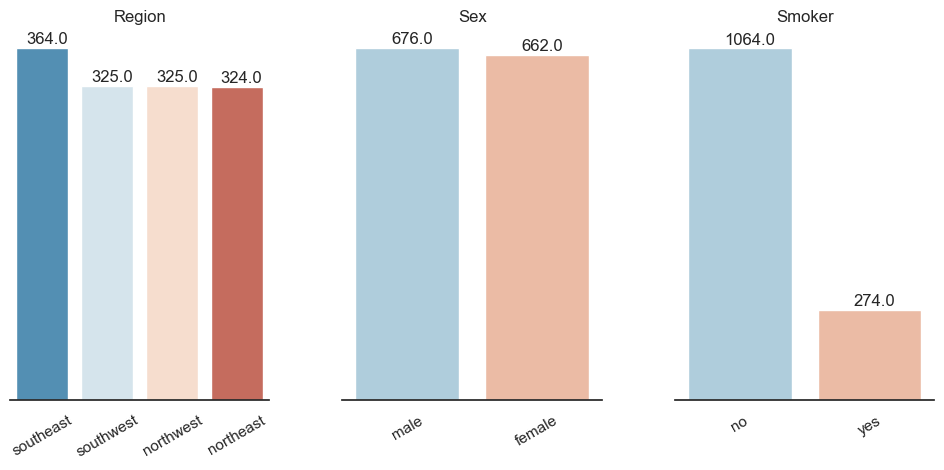

In [45]:
fig, ax = plt.subplots(1, 3)
fig.tight_layout(pad=0.1)
fig.set_size_inches(10, 4)
fig.subplots_adjust(hspace=10)

sns.set_style("white") # Options: darkgrid, whitegrid, dark, white, ticks

sns.countplot(x="region", data=df, ax=ax[0], order=df.region.value_counts().index, 
            palette=sns.color_palette("RdBu_r", df.region.nunique())).set_title('Region')
sns.countplot(x="sex", data=df, ax=ax[1], order=df.sex.value_counts().index, 
            palette=sns.color_palette("RdBu_r", df.sex.nunique())).set_title('Sex')
sns.countplot(x="smoker", data=df, ax=ax[2], order=df.smoker.value_counts().index, 
            palette=sns.color_palette("RdBu_r", df.smoker.nunique())).set_title('Smoker')
sns.despine(fig=fig, left=True)

ax[0].set_yticklabels('')
ax[1].set_yticklabels('')
ax[2].set_yticklabels('')

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[2].set_ylabel('')

ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

for p in ax[0].patches:
    ax[0].annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+4))
for p in ax[1].patches:
    ax[1].annotate(p.get_height(), (p.get_x()+0.28, p.get_height()+8))
for p in ax[2].patches:
    ax[2].annotate(p.get_height(), (p.get_x()+0.28, p.get_height()+10))

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=30)

plt.show()

As you can see, there is a lot you can do to customize charts. You might find it useful to browse the documentation on [seaborn aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).